# Data Distribution

## Heart Failure Dataset

### Imports and data loading

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

In [2]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:
data.mode()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,136.0,1.0,0.0,187,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN


Just by looking at how high some max values are compared to the mean, we cna predict there will be some outliers, lets plot some box plots to better see them.

## Boxplots

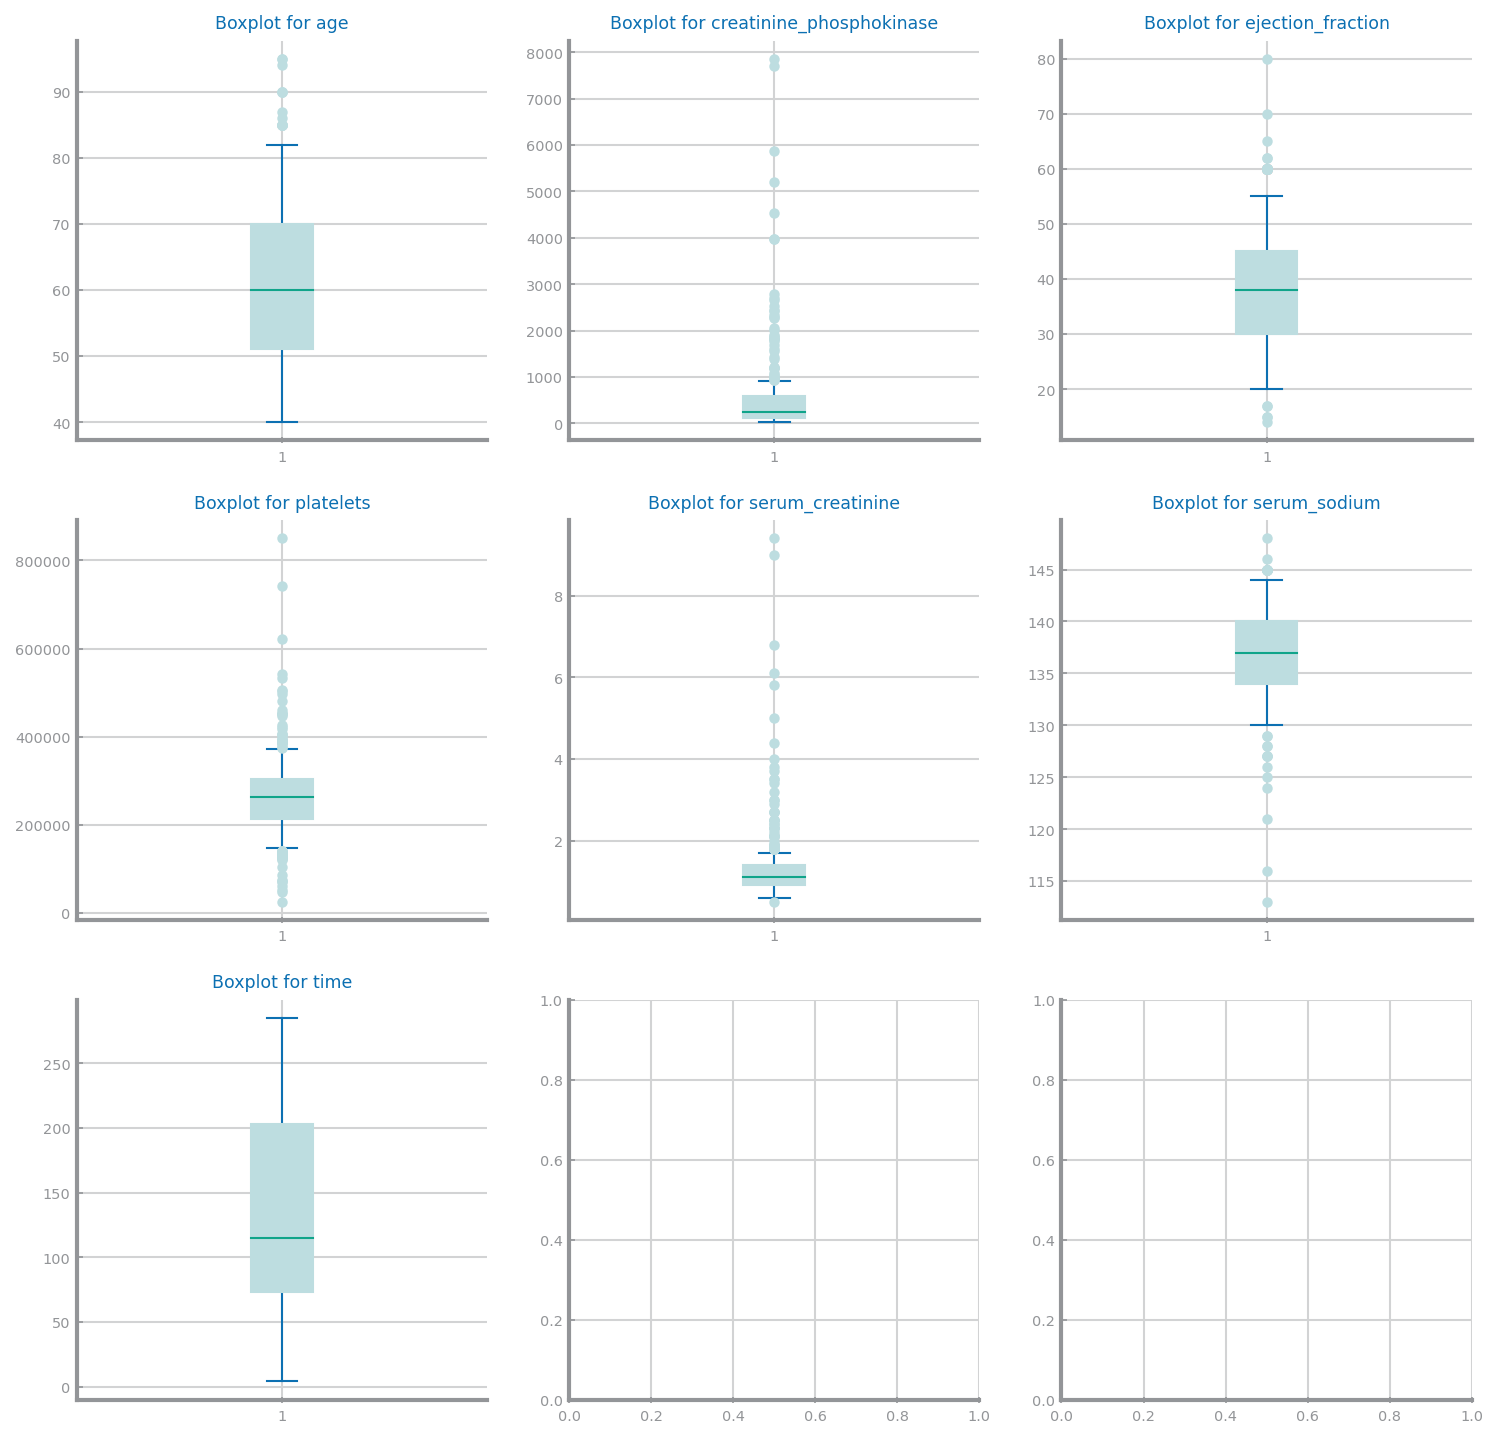

In [3]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

As we can see there are outliers present. The variables related to creatinine have a lot of them and really far com the most common values.

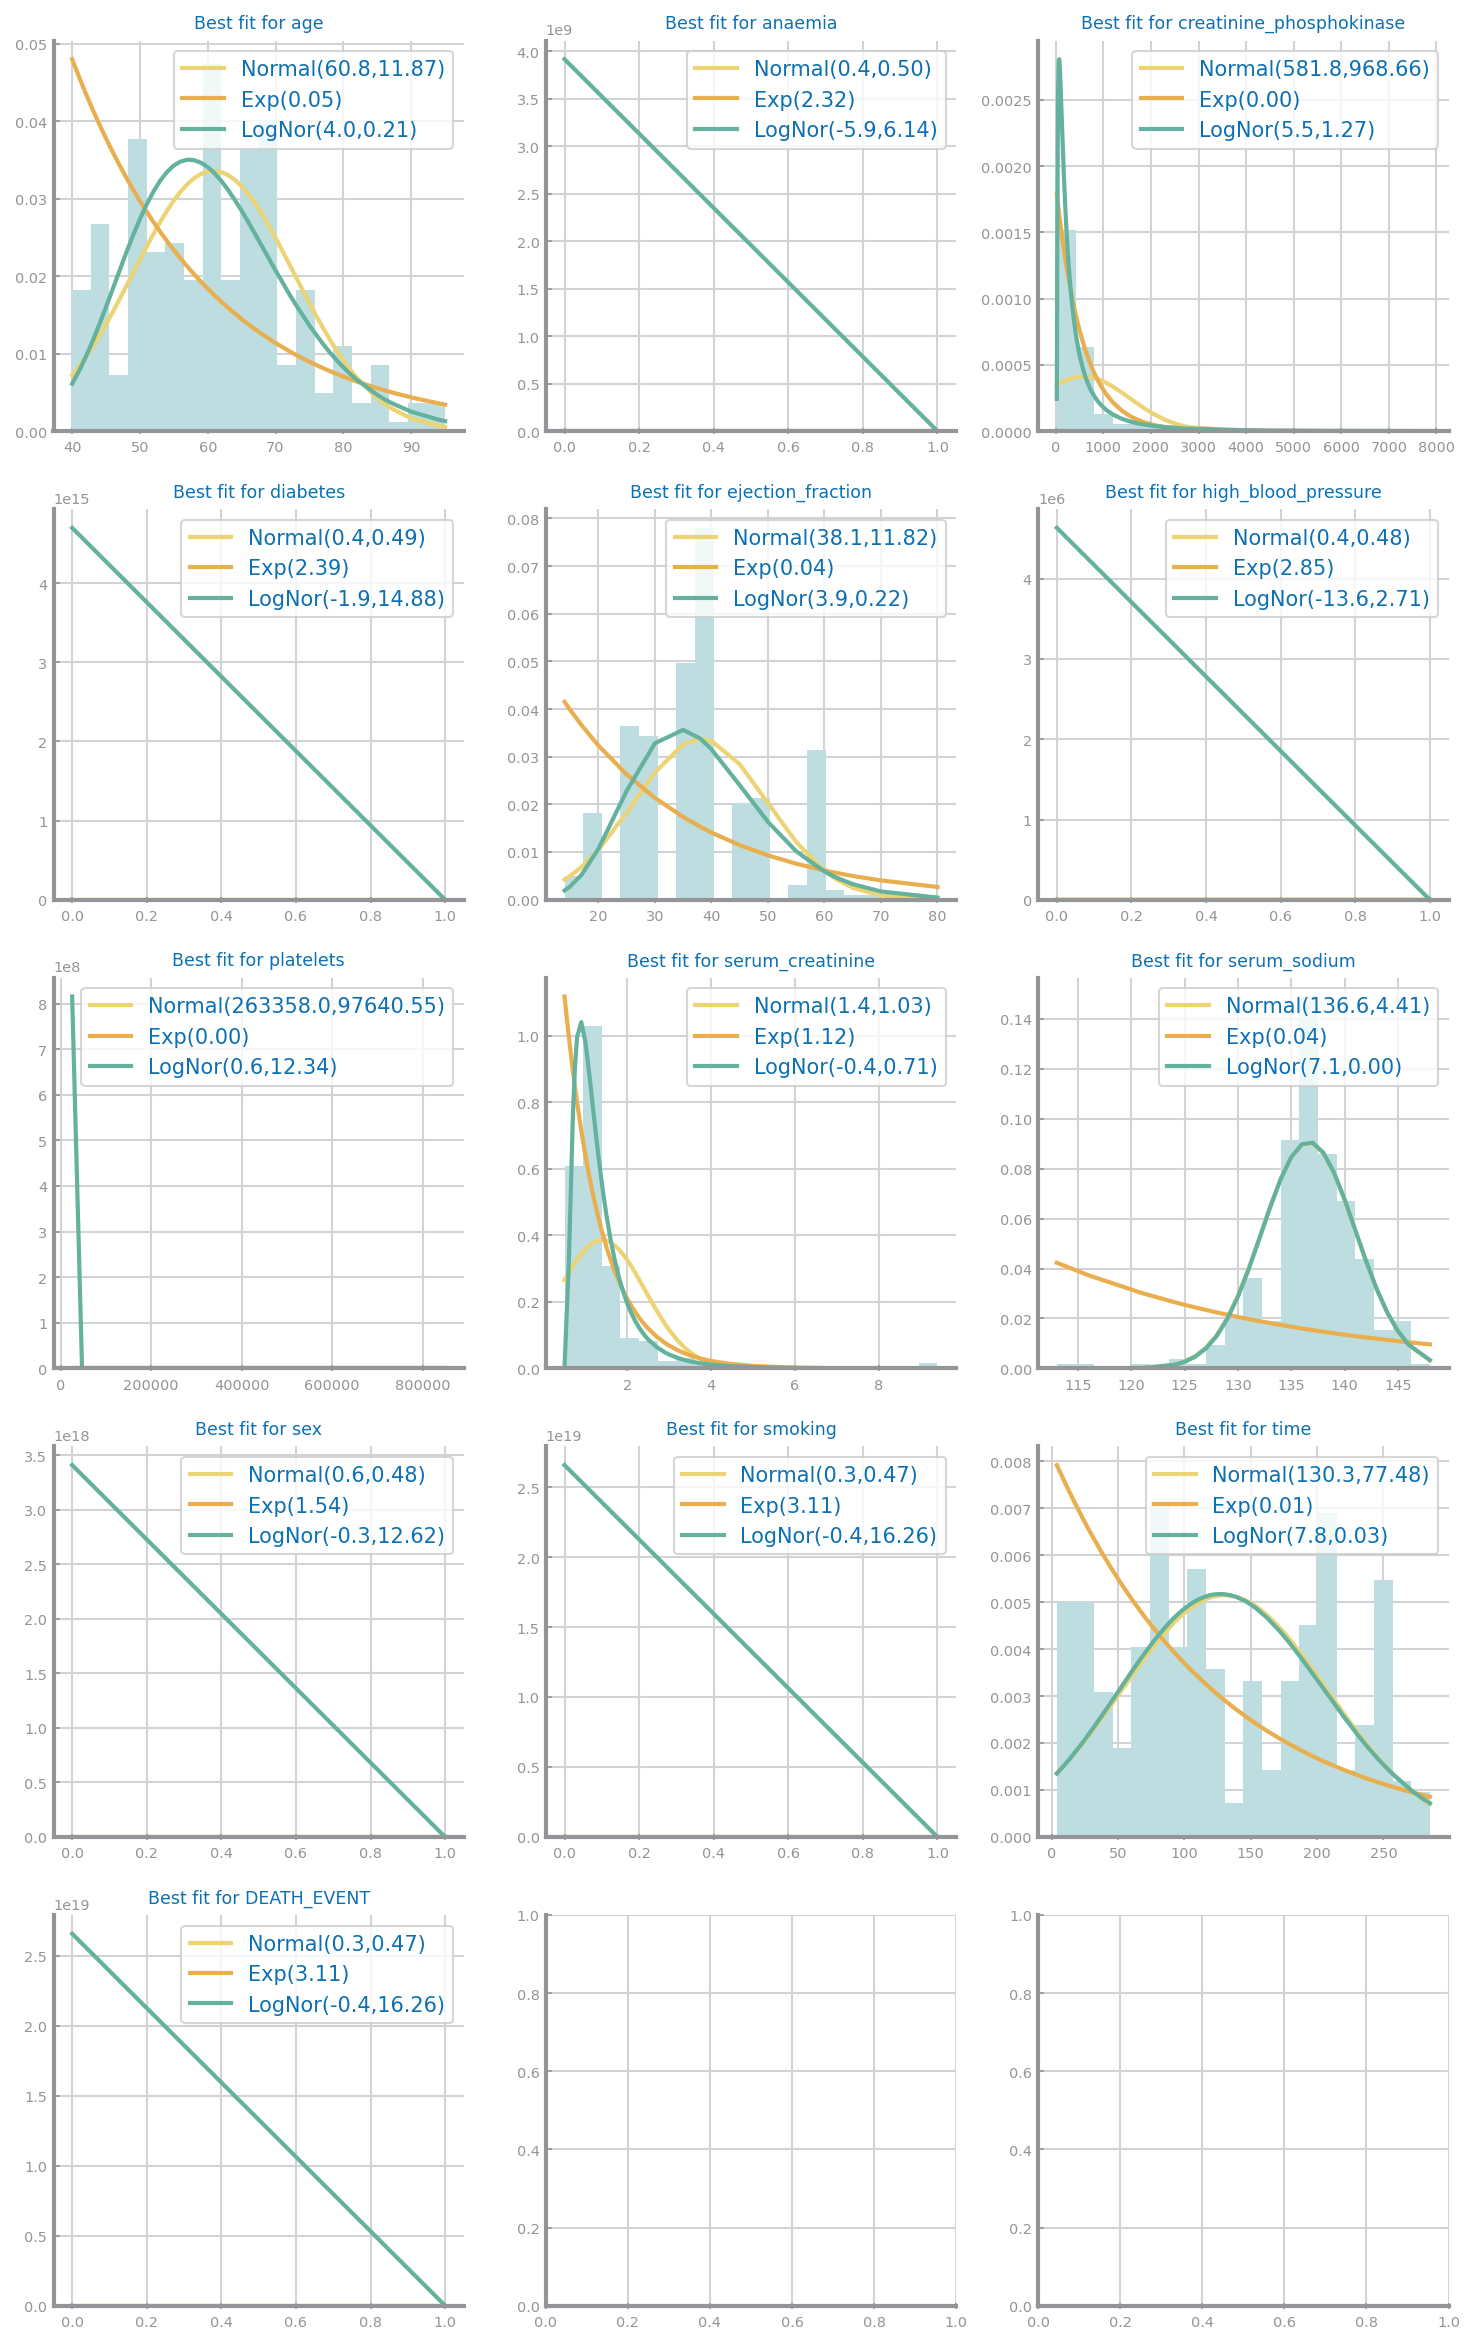

In [4]:
import scipy.stats as _stats
import numpy as np
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = _stats.lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    ax.set_title('Best fit for %s'%var)
    distributions = compute_known_distributions(values)
    #os axes ficqam desformatados quando uso a função do ds_funtions
    #ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')
    legend: list = []
    for name, y in distributions.items():
        ax.plot(values, y)
        legend.append(name)
    ax.legend(legend)

rows, cols = ds.choose_grid(len(numeric_vars))

fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

### Sumary

**What is the type and range for each variable?**
<pre>
Variable                   -  type       -  range
- age                      -  Numerical  -  40    to  95
- anemia                   -  Boolean    -  0     to  1
- creatinine_phosphokinase -  Numerical  -  23    to  7861
- diabetis                 -  Boolean    -  0     to  1
- ejection_fraction        -  Numerical  -  14    to  80
- high_blood_pressure      -  Boolean    -  0     to  1
- platelets                -  Numerical  -  25100 to  850000
- serum_creatinine         -  Numerical  -  0.5   to  9.4
- serum_sodium             -  Numerical  -  113   to  148
- sex                      -  Boolean    -  0     to  1
- smoking                  -  Boolean    -  0     to  1
- time                     -  Numerical  -  4     to  285
- DEATH_EVENT              -  Boolean    -  0     to  1
</pre>

**And its mean value, mode, standard deviation, and quartiles?**

It is easier to see at the start of the file than to re write it all again here.

**Are there outliers?**

Yes, there are outliers in age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine and serum_sodium. They seem to be most relevant in the creatinine related variables.

**Is it possible to identify each variable distribution?**

For most of the variables yes, but for time the results seem to be all over the place

## Oral Toxicity Dataset

### Reducing the variables

In [5]:
import csv

with open('../datasets/qsar_oral_toxicity.csv', newline='') as original_data:
    with open('../datasets/oral_reduced/ORAL_reduced32.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 31:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)

### Loading Data

In [6]:
data = pd.read_csv('../datasets/oral_reduced/ORAL_reduced32.csv', sep=';', header=None)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,00000000001000001000000000000000,00000000100000000000000000000000,00000000000000100010000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000000000000011100001000000,00100000000000000000000000000010,01000000000000000000000000000000,00000000000100000000000000000000,10000000000000000000000000000000,...,00010000000000000000001100000000,00000000000000000010100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001000000000000000000000000,00000000010000000000000000000000,01000000100000000000000000000000,10000000001000001000000001000100,00000000000000000000000000000000,negative
1,00100000001000001000000000000000,00000000000000000000000000000000,00000000000000100000000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000000000000010100001001000,00000000000100000000000000000010,00000000000000000000000000000000,00000000000000000000000000000000,10000000000000000000000000000010,...,00000000000000000000001100000000,00000000000000000010100000000000,00000000000000000000000000000000,00000000001000000000000000000000,00000001000000000100000000000000,00000010011000000000000000000000,01000000100000000000000000000000,10010000001000001000000001000000,00010000000000010000000000000000,negative
2,00000000001000001000000000000000,00000000000100000000000000000000,00000000000000100000000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000001000000010100001000000,00000000000000000000000000000010,00000000000000000000000000000000,00000000000000000000000000000000,10000000000000000000010001000000,...,00000000000000000000001100000000,00000000000000000000100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001000000000000000000101000,00000010010000000000000001000000,01000000100000000000000000000000,10000000001100001000000001000000,00110000000000000000000001000000,negative
3,00000001001000001000000000000000,00000000000000000000000000000000,00000000000000100000000000001010,00000000000000000000000000000000,00010000000000000000000000000000,00000000000000000010100001000000,00000000000000000000000000000010,00000000000000000000000001000000,00000000000000000000000000000000,10000000000000000000000000000000,...,00000000000000000000001100000000,00000000000000000000100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001010000000000010000000000,00000010010000000000000000000000,01001000100000000000000000000000,10000000001000001000000001000000,00010000000000001000000000000000,negative
4,00000000000001001000000000000000,00000000100000000000000000010000,00000000000000100000000000001000,00001000000000000000000000000000,00000000000000000000000000010000,00000000000000000000010000000000,00000000000101000000100000000010,00000000000000000000000001000000,00001000000000000000000000000000,10000000010000000000000000001000,...,01000000000000000000001100000000,00000000000000000000000000001010,00000000000001000001000000000000,00000000000000000000000000000000,00000001000000000100000000000000,00000010010000000000000000000000,00000010000000000000000000100000,10000000001000001000000001000000,00010100000000010000000000000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,00000001001001001000000000000000,00000000000000001000000000000000,10000000000000100000000000001001,01000001000000000010000000000000,00010000000000000000000000000000,00100000000001000011100001000000,00010010000100000100010000000010,00100000000000000000000001000000,00011000000000000000000000100000,10000000000000000000000000000000,...,00000010010000000000011100000000,00000000000000000000100000000000,00000000000001000001000000000000,00010110000000100000000000000000,01101001010000000000000000100000,01000010010000000000010000000000,01001000100000000000000000000000,10000000000000001001000001000010,00010010000000000000000000100000,negative
89

### Distribution

Since all of the variables in this dataset are boolean, is makes no sense to plot boxplots

33
on var  0
on var  1
on var  2
on var  3
on var  4
on var  5
on var  6
on var  7
on var  8
on var  9
on var  10
on var  11
on var  12
on var  13
on var  14
on var  15
on var  16
on var  17
on var  18
on var  19
on var  20
on var  21
on var  22
on var  23
on var  24
on var  25
on var  26
on var  27
on var  28
on var  29
on var  30
on var  31
on var  32
all done, will now plot chart


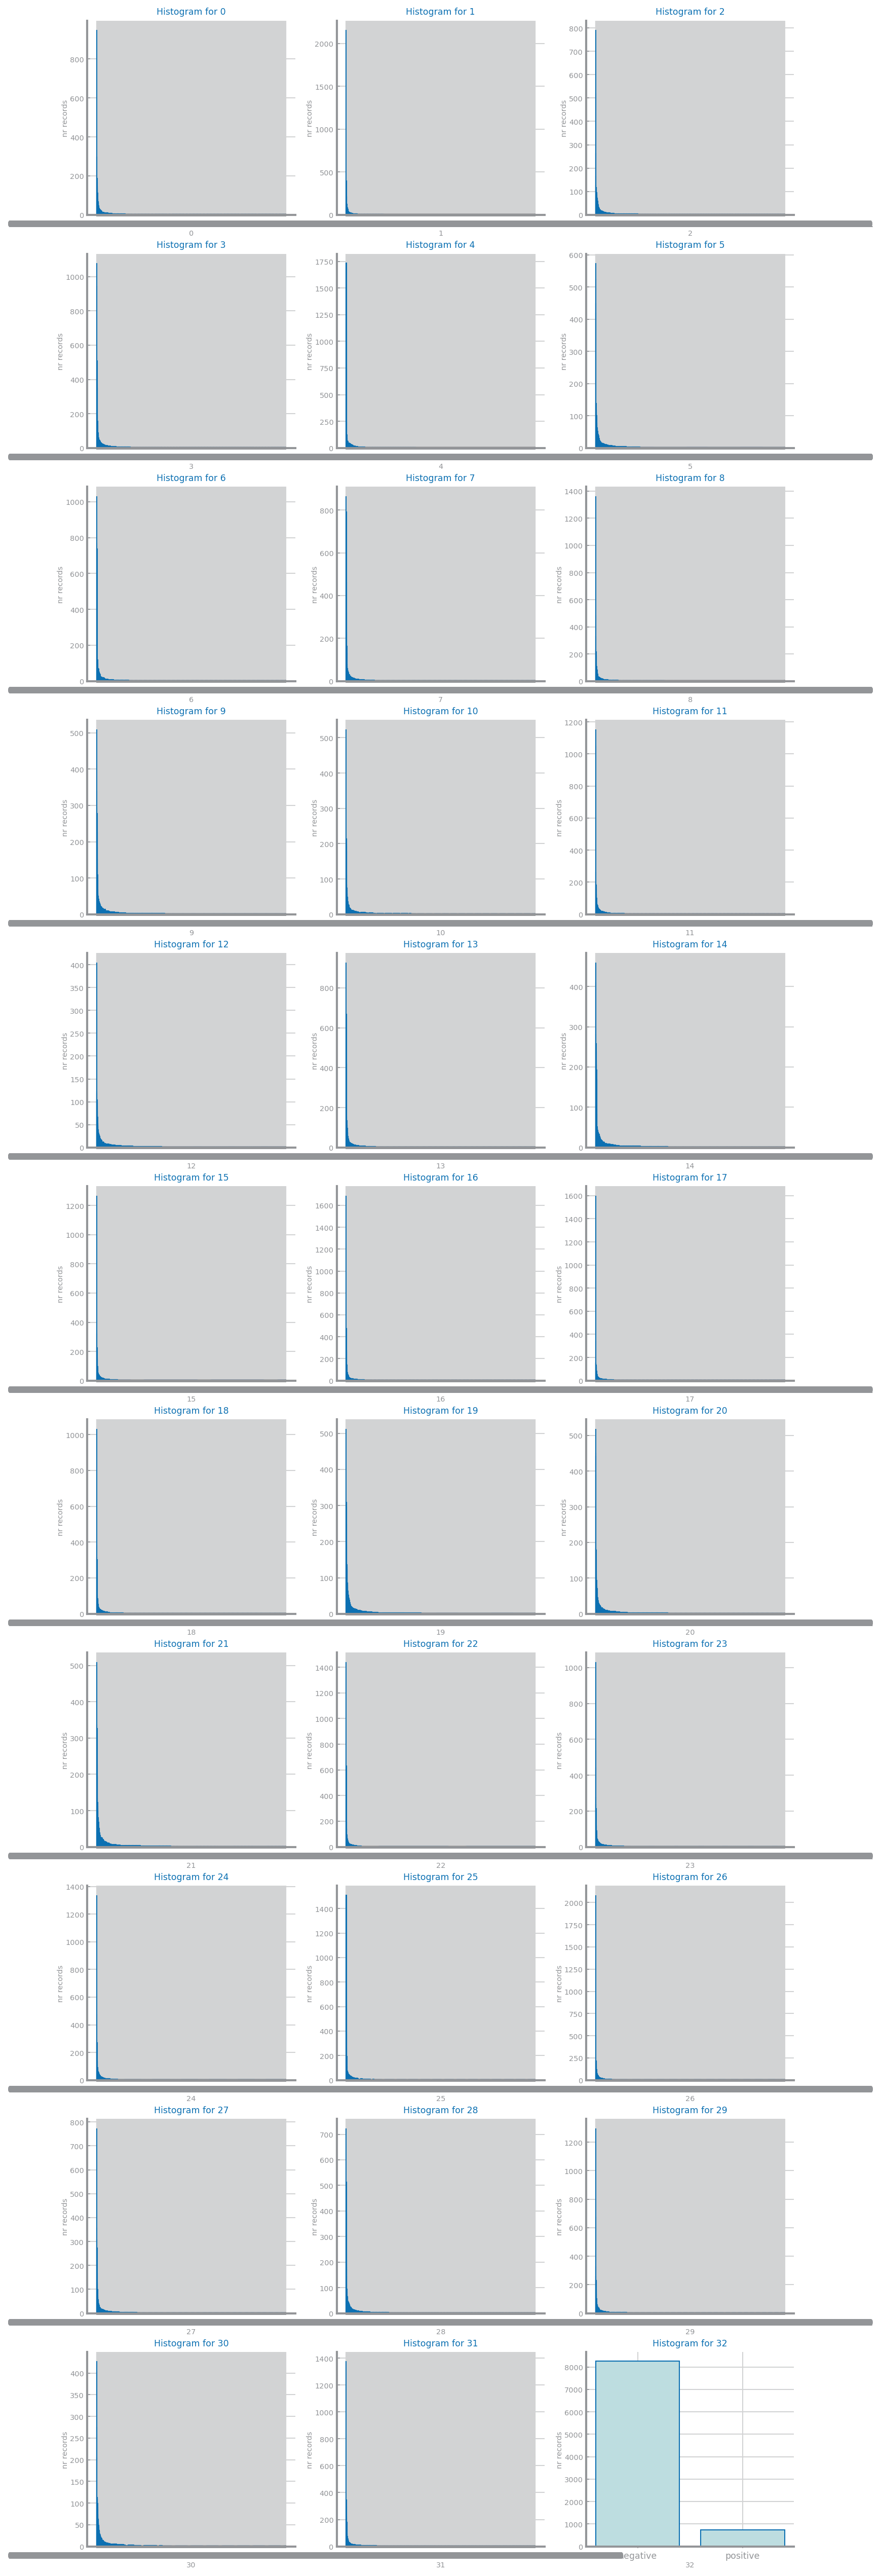

In [11]:
symbolic_vars = data.select_dtypes(include='object').columns
print(len(symbolic_vars))
rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(symbolic_vars)):
    print("on var ", n)
    counts = data[symbolic_vars[n]].value_counts()
    ds.bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
print("all done, will now plot chart")
plt.show()

### Sumary

**What is the type and range for each variable?**
- Thay all are boolean variables, and the only vallues they can take are 1 or 0

**And its mean value, mode, standard deviation, and quartiles?**
- Not relevant no analize in this case

**Are there outliers?**
- Not really

**Is it possible to identify each variable distribution?**
